In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

### Download Dataset

In [ ]:
!wget --no-check-certificate \
  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip \
  -O /tmp/kagglecatsanddogs_5340.zip

--2023-01-01 10:30:47--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.39.61.47, 2600:1407:3c00:a86::317f, 2600:1407:3c00:a8f::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.39.61.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/kagglecatsanddogs_5340.zip’

/tmp/kagglecatsandd 100%[===================>] 786.67M   181MB/s    in 4.4s    

2023-01-01 10:30:52 (178 MB/s) - ‘/tmp/kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



### Extract Dataset

In [ ]:
# ekstraksi pada file zip
local_zip = '/tmp/kagglecatsanddogs_5340.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/PetImages/'

### Check Directory

In [ ]:
# check PetImages directory
os.listdir('/tmp/PetImages')

['Dog', 'Cat']

Prepare Training Data

In [ ]:
import pandas as pd 
import random

In [ ]:
filenames = os.listdir("/tmp/PetImages/Dog")

df = pd.DataFrame({
    'filename': filenames,
    'category': 1
})

In [ ]:
df.head()

,filename,category
0,10932.jpg,1
1,4889.jpg,1
2,7762.jpg,1
3,6453.jpg,1
4,9738.jpg,1


In [ ]:
df.tail()

,filename,category
12496,5096.jpg,1
12497,2376.jpg,1
12498,1536.jpg,1
12499,6893.jpg,1
12500,1767.jpg,1


See sample image

In [ ]:
import matplotlib.pyplot as plt

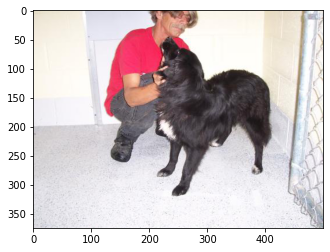

In [ ]:
sample = random.choice(filenames)
image = load_img("/tmp/PetImages/Dog/"+sample)
plt.imshow(image)

### Image Augmentation

*   Mengimplementasikan augmentasi gambar.
*   Menggunakan image data generator.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

### Prepare the Data

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size=(150, 150),  
        batch_size=4,
        class_mode='binary')

Found 25000 images belonging to 2 classes.


### Create Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 148, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 17, 128)      0

### Compile the Model

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

### Callback
*   penggunaan Callback

In [ ]:
# penggunaan Callback, accuracy threshold 97%
accuracy_threshold = 97e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True

### Training Model

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=25,  
      epochs=25,
      validation_data=validation_generator,
      verbose=2,
      callbacks = [my_callbacks()])

<ipython-input-38-5d450064a18c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25


ValueError: ignored

### Predict an Image

In [1]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # memprediksi gambar
  path = fn
  img = image.load_img(path, target_size=(100,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)  

  print(fn)
  print(classes)
  print(train_generator.class_indices)

  print(classes[0, 0])
  print(classes[0, 1])

  print(fn)
  if classes==1:   
   print('Dog')
  else:
   print('Cat')